In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

/home/navarra/snap/jupyter/common/lib/python3.7/site-packages/joblib/_multiprocessing_helpers.py:45: UserWarning: [Errno 13] Permission denied.  joblib will operate in serial mode
  warnings.warn('%s.  joblib will operate in serial mode' % (e,))


In [2]:
df = pd.read_csv('USArrests.csv', index_col = 0)

In [3]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [4]:
df.shape

(50, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [6]:
df.isnull().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

In [7]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [8]:
# Hopkins

In [9]:
from pyclustertend import hopkins

In [10]:
hopkins(df, df.shape[0])

0.4507430226238658

In [11]:
from sklearn.preprocessing import scale

In [12]:
hopkins(scale(df), df.shape[0])

0.408873671896173

In [13]:
# Kmeans

In [14]:
k_means = KMeans(n_clusters = 2).fit(df)

In [15]:
clusters = k_means.labels_

In [16]:
clusters

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int32)

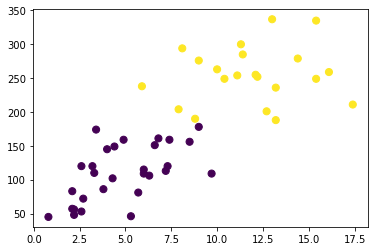

In [17]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = 'viridis')

In [18]:
centroids = k_means.cluster_centers_

In [19]:
centroids

array([[  4.84137931, 109.75862069,  64.03448276,  16.24827586],
       [ 11.85714286, 255.        ,  67.61904762,  28.11428571]])

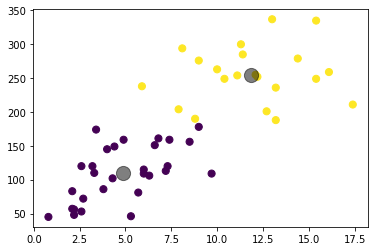

In [20]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = clusters, s = 50, cmap = 'viridis')
plt.scatter(centroids[:,0], centroids[:,1], c = 'black', s = 200, alpha = 0.5)

In [21]:
# Elbow Method

In [22]:
ssd = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters = k).fit((df))
    ssd.append(kmeans.inertia_)

In [23]:
ssd

[355807.82159999997,
 96399.02814449919,
 47964.265357142845,
 34728.629357142854,
 24417.023523809516,
 18875.46422222223,
 15606.797750000002,
 13329.36197619048,
 11125.033809523811]

In [24]:
K

range(1, 10)

Text(0, 0.5, 'Inertia')

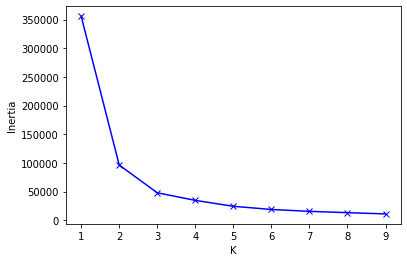

In [25]:
plt.plot(K, ssd, "bx-")
plt.xlabel("K")
plt.ylabel("Inertia")

In [26]:
from yellowbrick.cluster import KElbowVisualizer

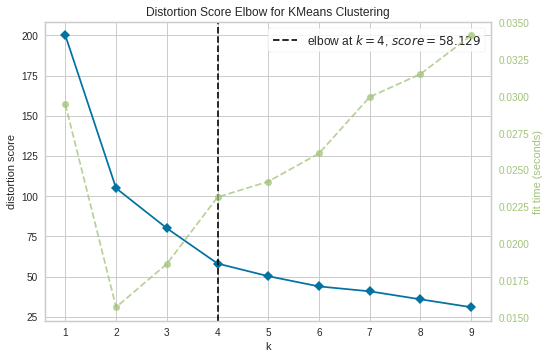

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (1,10))
visu.fit(scale(df))
visu.poof()

In [28]:
kmeans = KMeans(n_clusters = 4).fit(df)

In [29]:
labels = kmeans.labels_

In [30]:
df.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [31]:
df['cluster_id'] = labels

In [32]:
df.head()

,Murder,Assault,UrbanPop,Rape,cluster_id
Alabama,13.2,236,58,21.2,1
Alaska,10.0,263,48,44.5,1
Arizona,8.1,294,80,31.0,1
Arkansas,8.8,190,50,19.5,2
California,9.0,276,91,40.6,1


In [33]:
labels

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 3, 0, 1, 0, 3, 0, 0, 1, 3, 1, 2, 1,
       3, 1, 2, 0, 0, 1, 3, 2, 1, 1, 1, 3, 0, 2, 2, 0, 2, 1, 3, 2, 2, 0,
       3, 2, 2, 3, 3, 2], dtype=int32)

In [34]:
# Evaluation

In [35]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [36]:
print(f'Silhouette Score(n=4): {silhouette_score(df, labels)}')

Silhouette Score(n=4): 0.5017308871399259


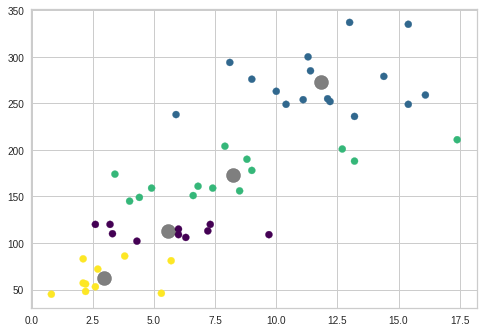

In [37]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = labels, s = 50, cmap = "viridis")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black',alpha=0.5, label = 'Centroids')

# ARI SCORE

In [38]:
new_df = df.sample(15)
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id
Wisconsin,2.6,53,66,10.8,3
Maryland,11.3,300,67,27.8,1
Alaska,10.0,263,48,44.5,1
Florida,15.4,335,80,31.9,1
Louisiana,15.4,249,66,22.2,1
Tennessee,13.2,188,59,26.9,2
Colorado,7.9,204,78,38.7,2
Montana,6.0,109,53,16.4,0
Ohio,7.3,120,75,21.4,0
Utah,3.2,120,80,22.9,0


In [53]:
new_df['true_labels'] = [3, 1, 1, 1, 1, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2]

In [54]:
new_df

,Murder,Assault,UrbanPop,Rape,cluster_id,true_labels
Wisconsin,2.6,53,66,10.8,3,3
Maryland,11.3,300,67,27.8,1,1
Alaska,10.0,263,48,44.5,1,1
Florida,15.4,335,80,31.9,1,1
Louisiana,15.4,249,66,22.2,1,1
Tennessee,13.2,188,59,26.9,2,2
Colorado,7.9,204,78,38.7,2,2
Montana,6.0,109,53,16.4,0,0
Ohio,7.3,120,75,21.4,0,0
Utah,3.2,120,80,22.9,0,0


In [55]:
from sklearn.metrics.cluster import adjusted_rand_score

In [56]:
adjusted_rand_score(new_df['true_labels'], new_df['cluster_id'])

0.6807017543859649

In [43]:
# RI = (number of agreeing pairs) / (number of pairs)

In [44]:
# ARI = (RI - Expected_RI) / (max(RI) - Expected_RI)

# Hierarchical Clustering

In [57]:
from scipy.cluster.hierarchy import linkage

In [58]:
hc_complete = linkage(df, method = 'complete')
hc_ward = linkage(df, method = 'ward')

In [59]:
from scipy.cluster.hierarchy import dendrogram

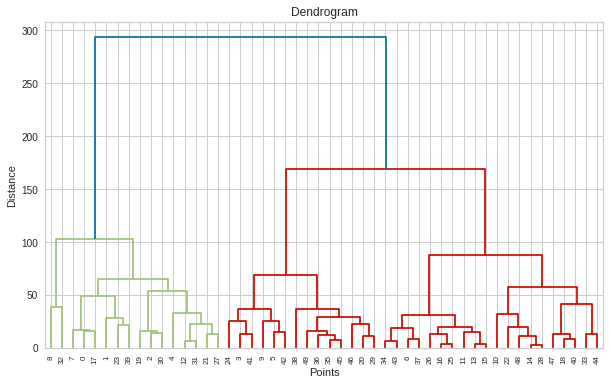

In [69]:
plt.figure(figsize = (10, 6))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
dendrogram(hc_complete)
plt.show()

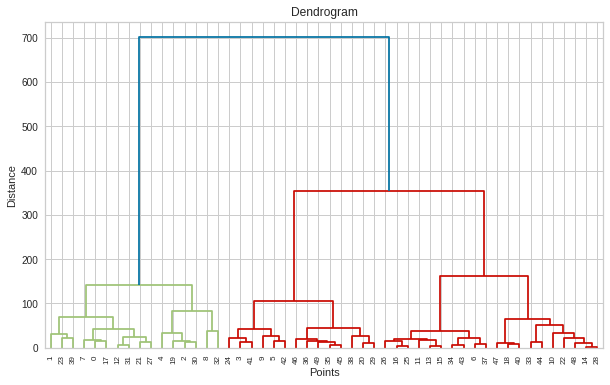

In [67]:
plt.figure(figsize = (10, 6))
plt.title('Dendrogram')
plt.xlabel('Points')
plt.ylabel('Distance')
dendrogram(hc_ward)
plt.show()

In [70]:
from sklearn.cluster import AgglomerativeClustering

In [94]:
cluster = AgglomerativeClustering(n_clusters = 3)

In [95]:
cluster.fit_predict(df)

array([1, 1, 1, 2, 1, 2, 0, 1, 1, 2, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 2, 1,
       0, 1, 2, 0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0,
       0, 2, 2, 0, 0, 2])

In [96]:
print(cluster.labels_)

[1 1 1 2 1 2 0 1 1 2 0 0 1 0 0 0 0 1 0 1 2 1 0 1 2 0 0 1 0 2 1 1 1 0 0 2 2
 0 2 1 0 2 2 0 0 2 2 0 0 2]


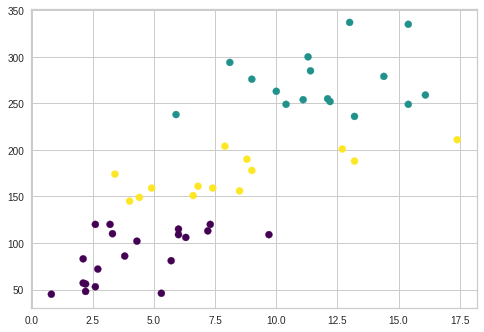

In [97]:
plt.scatter(df.iloc[:,0], df.iloc[:,1], c = cluster.labels_, s = 50, cmap = "viridis")

In [98]:
print(f'Silhouette Score(n=3): {silhouette_score(df, cluster.labels_)}')

Silhouette Score(n=3): 0.5317795266062432
